In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [3]:
sns.set_style("dark")

In [6]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


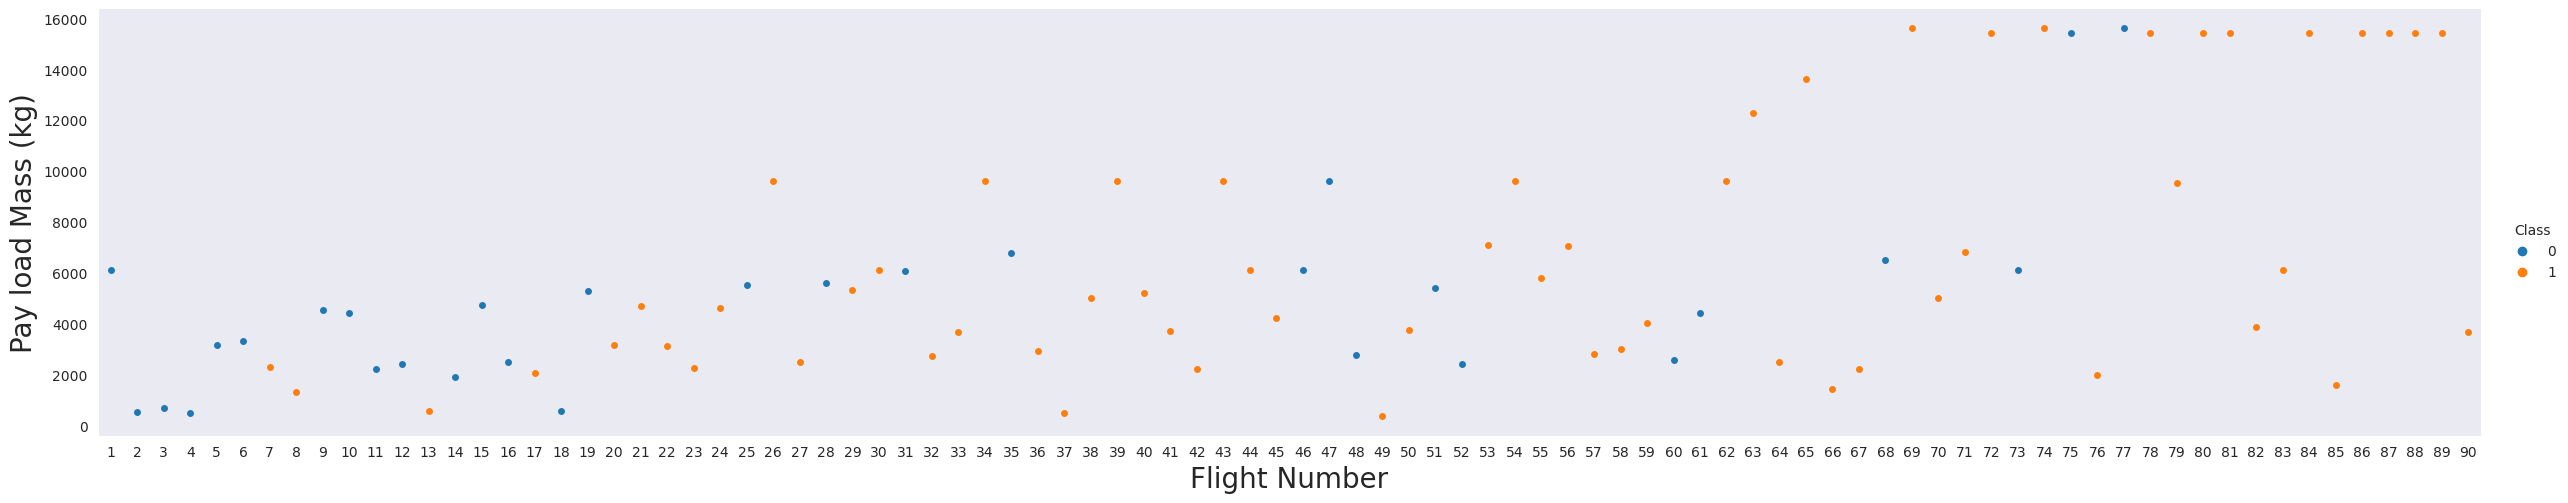

In [7]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [8]:
sns.set_palette("bright")

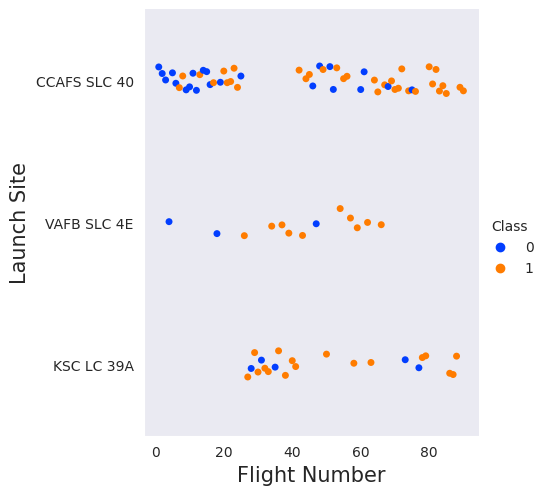

In [9]:
sns.catplot(data=df, x="FlightNumber", y="LaunchSite", hue="Class")
plt.ylabel("Launch Site",fontsize=15)
plt.xlabel("Flight Number",fontsize=15)
plt.show()

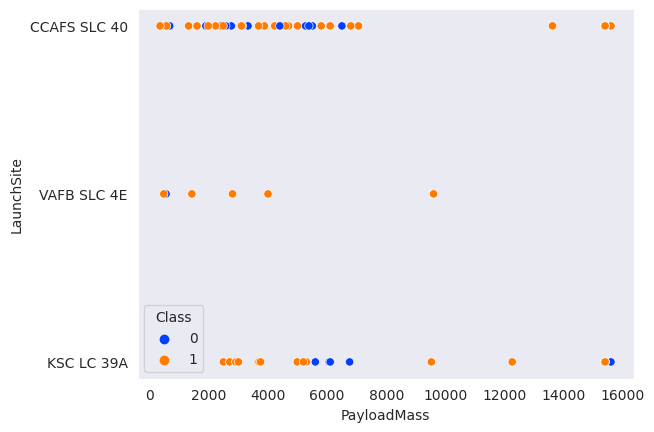

In [10]:
sns.scatterplot(data=df, x="PayloadMass", y="LaunchSite", hue="Class")
plt.show()

<ipython-input-11-ba19203d3fab>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_orbitsuccess = df.groupby('Orbit').mean().reset_index()


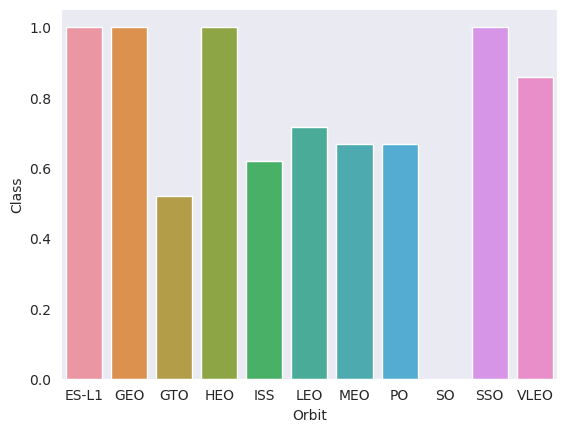

In [11]:
df_orbitsuccess = df.groupby('Orbit').mean().reset_index()

sns.barplot(data=df_orbitsuccess, x='Orbit', y='Class')
plt.show()

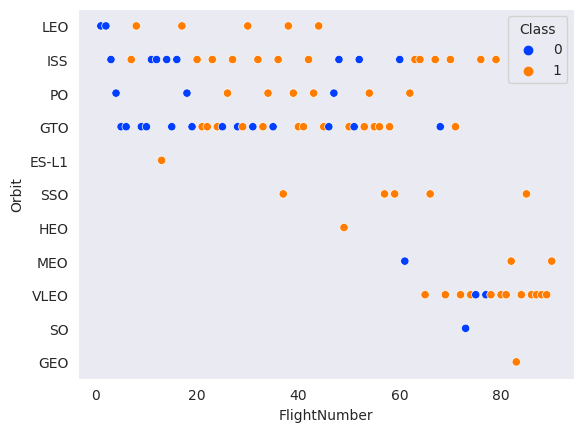

In [12]:
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class')
plt.show()

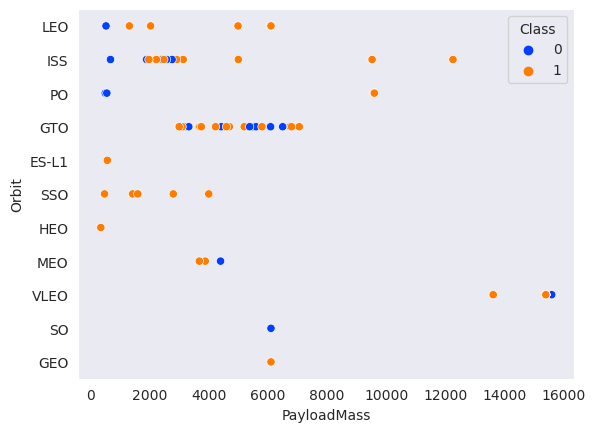

In [13]:
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class')
plt.show()

In [14]:
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [15]:
df['Year'] = Extract_year('Date')

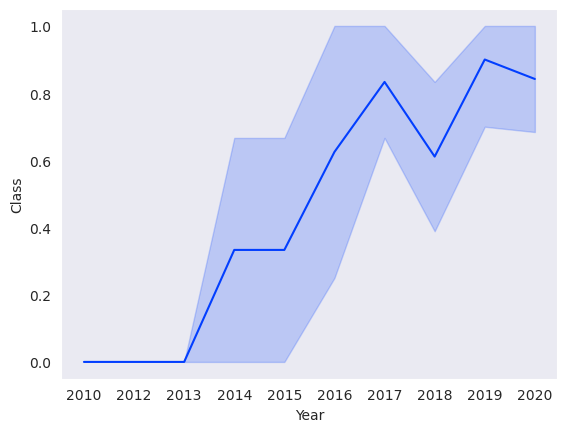

In [16]:
sns.lineplot(data=df, x='Year', y='Class')
plt.show()

In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [18]:
features_one_hot = pd.get_dummies(features)

In [19]:
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15400.000000,6,True,True,True,5.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
features_one_hot = features_one_hot.astype('float64')

In [21]:
features_one_hot.to_csv('dataset_part\_3.csv', index=False)